# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | bad hall
Processing Record 3 of Set 1 | valparaiso
Processing Record 4 of Set 1 | harnosand
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | opuwo
Processing Record 11 of Set 1 | nar'yan-mar
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | christchurch
Processing Record 15 of Set 1 | al ajaylat
City not found. Skipping...
Processing Record 16 of Set 1 | as sulayyil
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | el calafate
Processing Record 20 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bad hall,48.0383,14.2077,6.87,81,100,2.24,AT,1707714488
1,valparaiso,-33.0393,-71.6273,14.80,88,0,1.54,CL,1707714488
2,harnosand,62.6323,17.9379,-9.00,98,100,2.07,SE,1707714488
3,longyearbyen,78.2186,15.6401,-9.09,67,40,5.66,SJ,1707714489
4,bredasdorp,-34.5322,20.0403,18.44,91,2,2.06,ZA,1707714489


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bad hall,48.0383,14.2077,6.87,81,100,2.24,AT,1707714488
1,valparaiso,-33.0393,-71.6273,14.80,88,0,1.54,CL,1707714488
2,harnosand,62.6323,17.9379,-9.00,98,100,2.07,SE,1707714488
3,longyearbyen,78.2186,15.6401,-9.09,67,40,5.66,SJ,1707714489
4,bredasdorp,-34.5322,20.0403,18.44,91,2,2.06,ZA,1707714489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

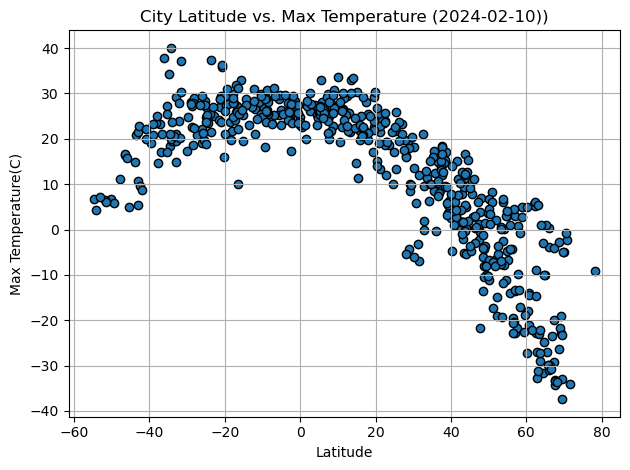

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (2024-02-10))")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

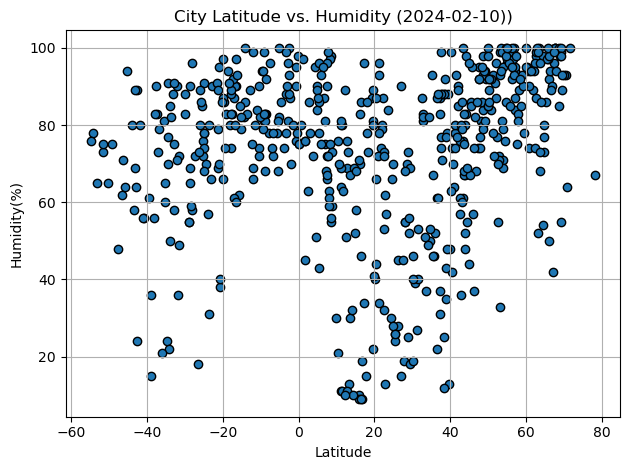

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2024-02-10))")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

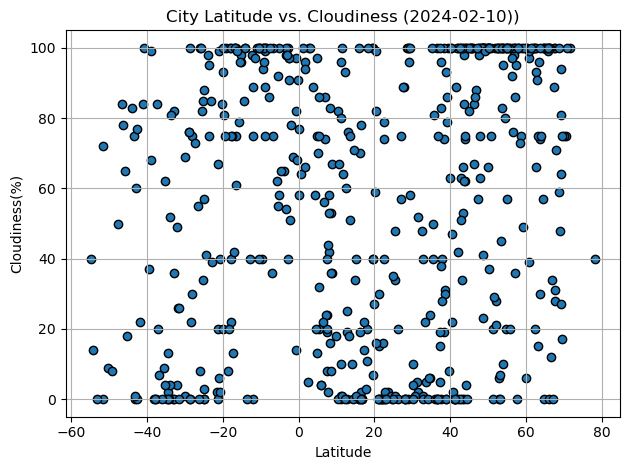

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2024-02-10))")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

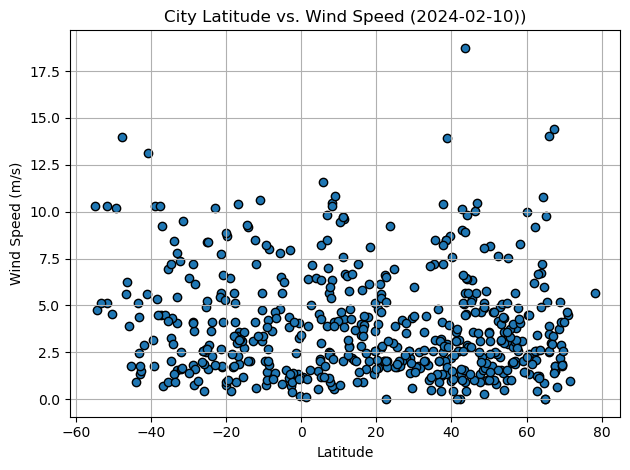

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2024-02-10))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
# The Function

def linerWeather(x,y,z):
    if z == "south":
        xy=southern_hemi_df
    else:
        xy=northern_hemi_df
    X_value = xy[x]
    Y_value = xy[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
    print(f"The r-value is: {rvalue}")
    line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"
    regress_values = X_value * slope + intercept
    
    plt.scatter(X_value, Y_value)
    plt.plot(X_value,regress_values,"r-")
    plt.annotate(line_eq, (X_value.min()+20,Y_value.min()+10), fontsize=15, color="red") 

    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()


In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bad hall,48.0383,14.2077,6.87,81,100,2.24,AT,1707714488
2,harnosand,62.6323,17.9379,-9.00,98,100,2.07,SE,1707714488
3,longyearbyen,78.2186,15.6401,-9.09,67,40,5.66,SJ,1707714489
8,nar'yan-mar,67.6713,53.0870,-33.27,100,31,1.79,RU,1707714490
12,as sulayyil,20.4607,45.5779,15.14,44,82,4.79,SA,1707714491


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,valparaiso,-33.0393,-71.6273,14.80,88,0,1.54,CL,1707714488
4,bredasdorp,-34.5322,20.0403,18.44,91,2,2.06,ZA,1707714489
5,adamstown,-25.0660,-130.1015,24.77,91,57,8.39,PN,1707714489
6,touros,-5.1989,-35.4608,26.31,82,58,5.68,BR,1707714329
7,opuwo,-18.0607,13.8400,21.81,80,100,1.74,NaN,1707714490


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8777973633606121


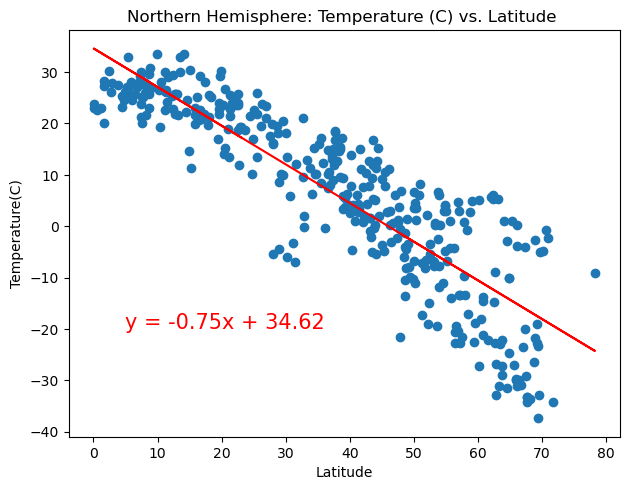

The r-value is: -0.8777973633606121


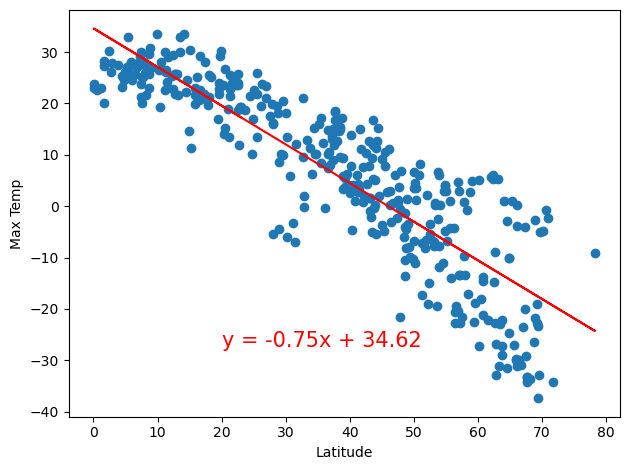

In [77]:
# Method 1 - Manual Coding - the linear regression analysis is performed directly within the script without using the function
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = northern_hemi_df["Lat"] * slope + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, ((5, -20)), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature(C)")
plt.tight_layout()
plt.title("Northern Hemisphere: Temperature (C) vs. Latitude ")

# Show plot
plt.show()

# Method 2 - Linear regression on Northern Hemisphere using the function
linerWeather("Lat","Max Temp","north")


The r-value is: 0.5610878368224334


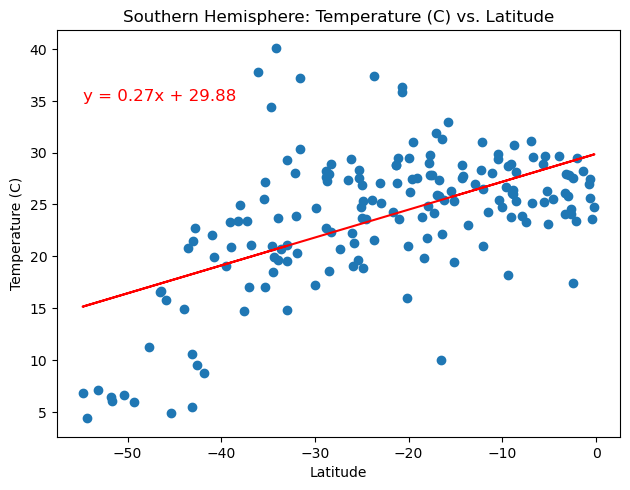

The r-value is: 0.5610878368224334


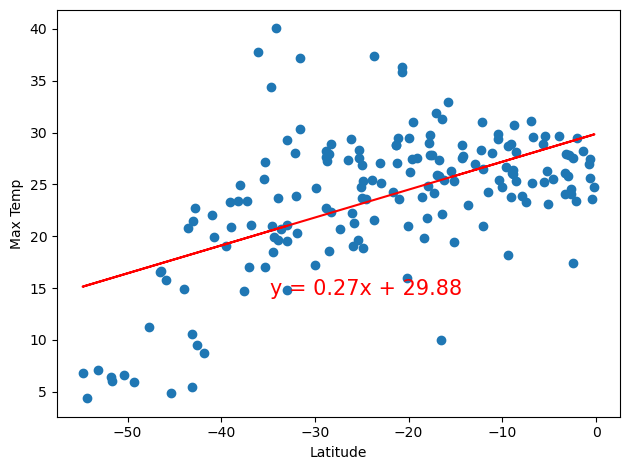

In [75]:
# Method 1 - Manual Coding - the linear regression analysis is performed directly within the script without using a function
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = southern_hemi_df["Lat"] * slope + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (southern_hemi_df["Lat"].min(), 35), fontsize=12, color="red")



# # Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.tight_layout()
plt.title("Southern Hemisphere: Temperature (C) vs. Latitude")

# # Show plot
plt.show()

# Method 2 - Linear regression on Southern Hemisphere using the function
linerWeather("Lat","Max Temp","south")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern Hemisphere Plot: As you move north from the equator (towards the North Pole), temperatures tend to get colder. So, the higher the latitude (farther north you go), the lower the temperature. The line we drew shows this relationship. It's like when you climb a mountain – it gets colder as you go higher up.

Southern Hemisphere Plot: On the flip side, as you move south from the equator (towards the South Pole), temperatures tend to get warmer. So, the higher the latitude (farther south you go), the higher the temperature. Again, the line we drew shows this pattern. It's like when you descend from a mountain – it gets warmer as you go down.

The r-value in Notrhern shows a high correlation between latitude and temperature. while the r-value in the Southern Hemisphere shows a moderate  correlation.

These plots help us understand how temperature changes with distance from the equator, which is important for understanding weather patterns around the world.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3956745272278933


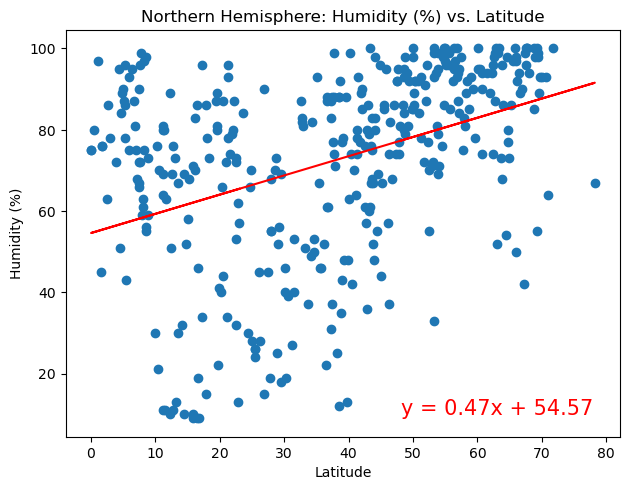

The r-value is: 0.3956745272278933


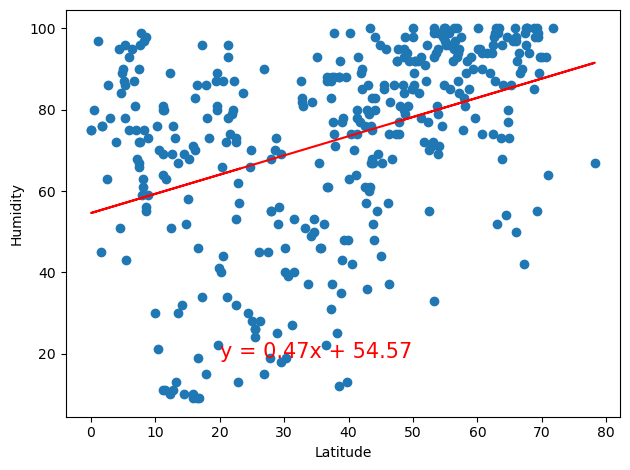

In [74]:
# Method 1 - Manual coding
# Northern Hemisphere
X_value = northern_hemi_df["Lat"]
Y_value = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value)
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-30,10), fontsize=15, color="red") 

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Northern Hemisphere using the function
linerWeather("Lat","Humidity","north")


The r-value is: 0.40153771907107255


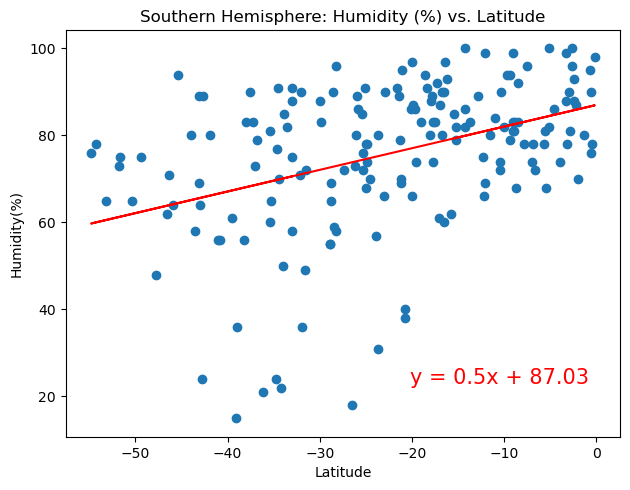

The r-value is: 0.40153771907107255


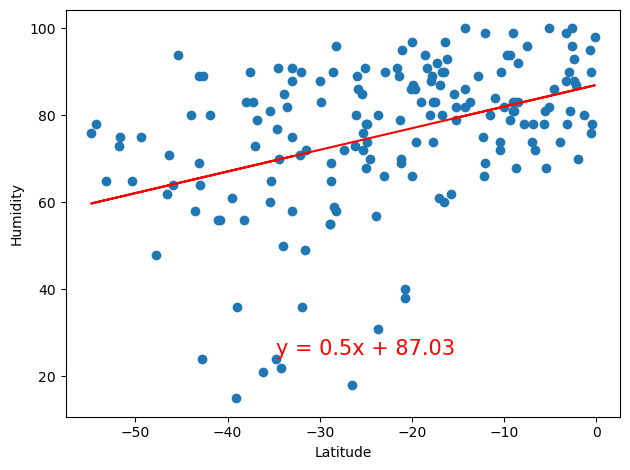

In [79]:
# Method 1 - Manual coding
# Southern Hemisphere
X_value = southern_hemi_df["Lat"]
Y_value = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value)
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-20,Y_value.min()+8), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
#plt.grid(True) 
plt.tight_layout()
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Southern Hemisphere using the function
linerWeather("Lat","Humidity","south")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the Northern Hemisphere, it shows as latitude goes up, humidity increases as well. r-value shows a moderate correlation between latitude and humidity.

In the Southern Hemisphere, it shows as latitude goes up, humidity increases. r-value shows a moderate to low correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.33510564627061107


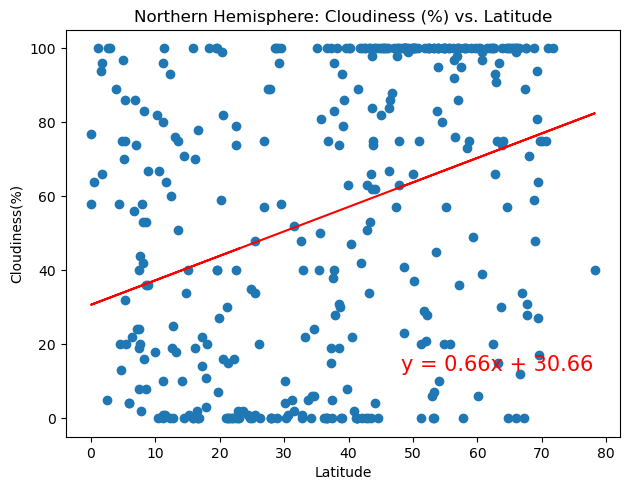

The r-value is: 0.33510564627061107


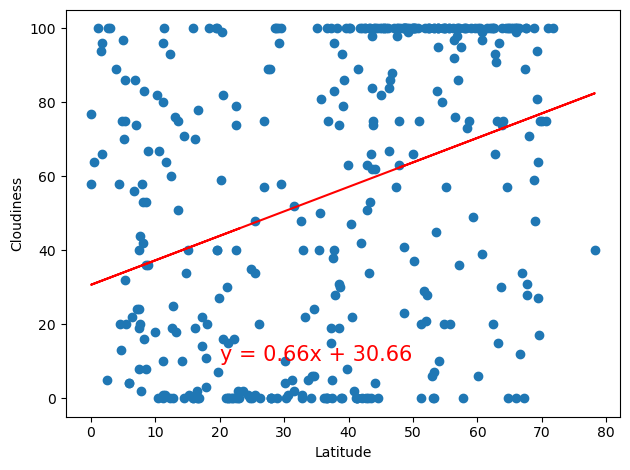

In [81]:
# Method 1 - Manual coding
# Northern Hemisphere
X_value = northern_hemi_df["Lat"]
Y_value = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value) 
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-30,13), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
# plt.grid(True) 
plt.tight_layout()
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Northern Hemisphere using the function
linerWeather("Lat","Cloudiness","north")

The r-value is: 0.46123412904001493


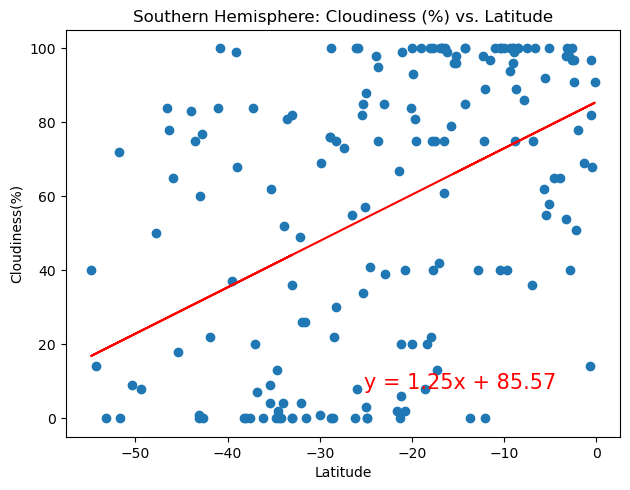

The r-value is: 0.46123412904001493


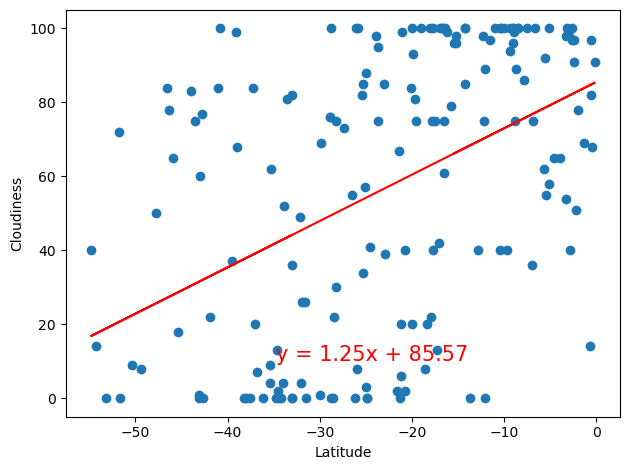

In [82]:
# Method 1 - Manual coding
# Southern Hemisphere
X_value = southern_hemi_df["Lat"]
Y_value = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value) #no need ,edgecolors="black"
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-25,Y_value.min()+8), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
# plt.grid(True) #no grid
plt.tight_layout()
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Southern Hemisphere using the function
linerWeather("Lat","Cloudiness","south")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, it shows as latitude goes up, cloudiness increases. r-value shows a moderate to low correlation between latitude and cloudiness.

In the Southern Hemisphere, it shows as latitude goes up, cloudiness increases. r-value shows a low correlation between latitude and cloudinss.



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.059385744848298144


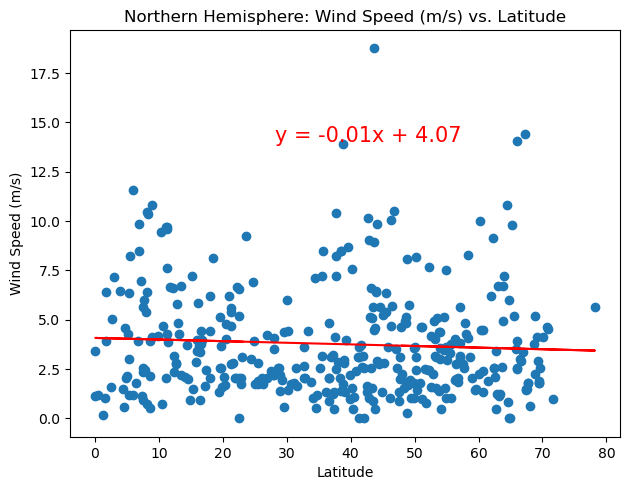

The r-value is: -0.059385744848298144


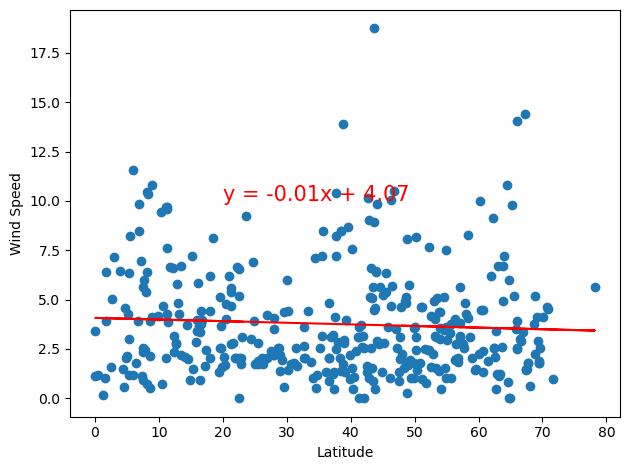

In [85]:
# Method 1 - Manual coding
# Northern Hemisphere
X_value = northern_hemi_df["Lat"]
Y_value = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value) #no need ,edgecolors="black"
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-50,14), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
#plt.grid(True) #no gridlines
plt.tight_layout()
plt.title("Northern Hemisphere: Wind Speed (m/s) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Northern Hemisphere using the function
linerWeather("Lat","Wind Speed","north")


The r-value is: -0.2448902611069426


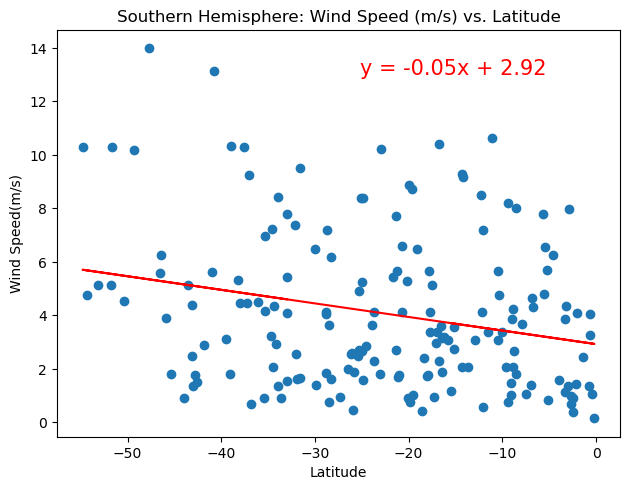

The r-value is: -0.2448902611069426


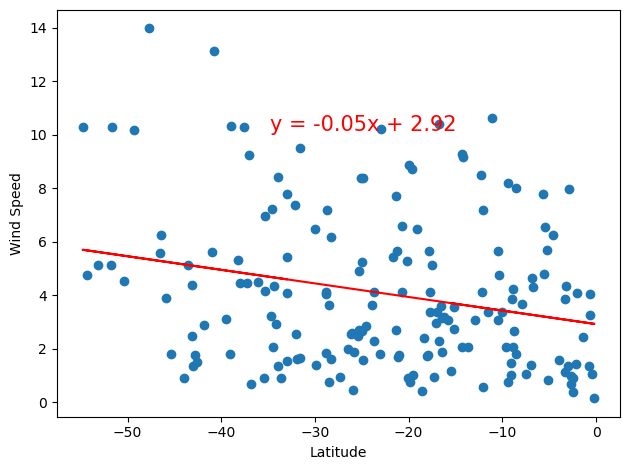

In [96]:
# Method 1 - Manual coding
# Southern Hemisphere
X_value = southern_hemi_df["Lat"]
Y_value = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_value, Y_value)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_values = X_value * slope + intercept

plt.scatter(X_value, Y_value) #no need ,edgecolors="black"
plt.plot(X_value,regress_values,"r-")
plt.annotate(line_eq, (X_value.max()-25,13), fontsize=15, color="red") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
# plt.grid(True) #no gridlines
plt.tight_layout()
plt.title("Southern Hemisphere: Wind Speed (m/s) vs. Latitude")

# Show plot
plt.show()

# Method 2 - Linear regression on Southern Hemisphere using the function
linerWeather("Lat","Wind Speed","south")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, it shows that latitude does not affect wind speed. r-value shows almost no correlation between latitude and cloudiness.
In the Southern Hemisphere, it shows as latitude goes up, wind speed decreases. r-value shows a low correlation between latitude and wind speed.
